In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## OLS ASSUMPTIONS

1. Linearity
2. No endogeneity
3. Normality and homoscedasticity
4. No autocorrelation
5. No multicollinearity

In [4]:
ds1 = pd.read_csv("../gpa.csv") #Data set with an additional random variable

In [5]:
ds2 = ds1.copy()
ds2.drop(columns="Rand 1,2,3", inplace=True)

In [6]:
print(ds1.columns)
print(ds2.columns)

Index(['SAT', 'Rand 1,2,3', 'GPA'], dtype='object')
Index(['SAT', 'GPA'], dtype='object')


In [7]:
y1 = ds1["GPA"]
x1 = ds1[["SAT", "Rand 1,2,3"]]
X1 = sm.add_constant(x1)
results1 = sm.OLS(y1, X1).fit()
results1.summary()

/srv/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Fri, 27 Sep 2019   Prob (F-statistic):           6.58e-10
Time:                        20:47:45   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
y2 = ds2["GPA"]
x2 = ds2["SAT"]
X2 = sm.add_constant(x2)
results2 = sm.OLS(y2, X2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 27 Sep 2019   Prob (F-statistic):           7.20e-11
Time:                        20:47:45   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Linear regression equation for first data set (ds1; w/ random variable) is: y1_hat =  0.2960 + 0.0017 * SAT - 0.0083 * Rand 1,2,3

Regression line equation for second data set (ds2) is:                 y2_hat = 0.2750 + 0.0017 * SAT

With an additional random variable, explanatory power of the model is increased (R^2 of ds1 is greater than R^2 of ds2). But if we look at adjusted R^2 of ds1, we can see that it is less than ds2's R^2. 

We were penalized for adding an additional variable that had no strong explanatory power.

p-value for "Rand 1,2,3" variable is 0.762. For coefficient to be statistically significant, p-value must be less than 0.05. It is not case in our example so variable "Rand 1,2,3" is insignificant which means that we can not reject null hypothesis. In other words, variable "Rand 1,2,3" is useless!

As reminder, null hypothesis states that beta2 (coefficient along variable "Rand 1,2,3,") is equal to zero.

## Visualization

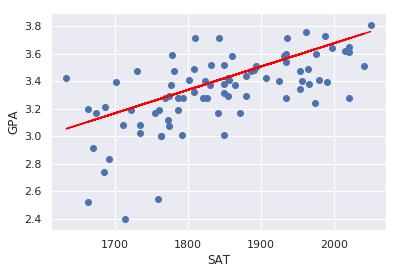

In [14]:
plt.scatter(x2, y2)
y2_hat = 0.2750 + 0.0017 * ds2["SAT"]
fig = plt.plot(ds2["SAT"], y2_hat, color="red")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

## Prediction

In [18]:
prediction = 0.2750 + 0.0017 * 1643
prediction

3.0681

For SAT of 1643, we can expect GPA to be approximatey 3.0681